In [1]:
data_path = '/Users/stephenthomas/Google Drive/Research/2017/Papers/Epoxpy_methods_paper/data/glass_transition_DGEBA/'
data_path = "/home/sthomas/projects/LB_mixing"


In [2]:
import signac
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
from scipy.signal import argrelextrema as argex
import matplotlib.cm as cm
import itertools

            
names={'iso':'Isothermal','lin_ramp':'Linear Ramp','step':'Step'}
colors={'iso':'C0','lin_ramp':'C1','step':'C2'}
markers={'iso':'s','lin_ramp':'P','step':'>'}
linestyles={'iso':'-','lin_ramp':'--','step':'-.'}

project = signac.get_project(data_path)
df_index = pd.DataFrame(project.index())
df_index = df_index.set_index(['_id'])
statepoints = {doc['_id']: doc['statepoint'] for doc in project.index()}
#print(statepoints)
df = pd.DataFrame(statepoints).T.join(df_index)
df = df.sort_values('T')
#df.head()

In [3]:
df_filtered = df[(df.bond==True)&
                (df.cure_percent>80)]

print('FO_model_R2',df_filtered.FO_model_R2.mean())
print('SAFO_model_R2',df_filtered.SAFO_model_R2.mean())
print('SO_model_R2',df_filtered.SO_model_R2.mean())
print('SASO_model_R2',df_filtered.SASO_model_R2.mean())
print('SASO_model_R2',df_filtered.SASO_model_R2.mean())
#df_filtered.temp_prof

FO_model_R2 0.9971293327486196
SAFO_model_R2 nan
SO_model_R2 0.9139578143319768
SASO_model_R2 0.9875520328568836
SASO_model_R2 0.9875520328568836


In [4]:
# Chapter4/notebooks/all/glass_transition/gel_point_detection/gel_point_detection
# Chapter4/notebooks/all/glass_transition/gel_point_detection.ipynb

### import numpy as np
import gsd
import gsd.fl
import gsd.hoomd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
#plt.style.use('ggplot')
#%matplotlib inline


def find_indices(lst, condition):
    return [i for i, elem in enumerate(lst) if condition(elem)]

def save_network_data(job,nSamples=20):
    '''
        Performs network analysis on the final frame and saves important info in job document.
    '''
    gsd_path=job.fn('data.gsd')
    #print(job)
    f = gsd.fl.GSDFile(gsd_path, 'rb')
    t = gsd.hoomd.HOOMDTrajectory(f)
    n_frames = len(t)
    print('total frames ',n_frames)
    last_frame = n_frames-1
    cluster_distributions = []
    fig = plt.figure(figsize=(12,9))
    time_conv = job.sp.dcd_write
    snapshot = t[int(last_frame)]
    bonds = snapshot.bonds.group
    G = nx.MultiGraph(ts='time_step:{}, kT:{}'.format(last_frame*time_conv,job.sp.kT))
    bond_types = [snapshot.bonds.types[i] for i in snapshot.bonds.typeid]
    #print(bond_types)
    ab_indices = find_indices(bond_types, lambda e: e == 'A-B')
    ab_bonds = [bonds[i] for i in ab_indices]
    for bond in ab_bonds:
        G.add_edge(bond[0],bond[1])
    sorted_cc = [len(c) for c in sorted(nx.connected_components(G), key=len, reverse=False)]
    num_clusters=len(sorted_cc)
    if len(sorted_cc) > 0:
        largest_network=sorted_cc[-1]
        if len(sorted_cc)==1:
            second_largest_network=sorted_cc[-1]
        else:
            second_largest_network=sorted_cc[-2]
        average_network_len=np.mean(sorted_cc)
    else:
        largest_networks.append(0)
        second_largest_networks.append(0)
    n, bins, patches = plt.hist(sorted_cc, 50, normed=1, facecolor='green', alpha=0.75)
    plt.xlabel('Cluster Length',fontsize=40)
    plt.ylabel('Probability',fontsize=40)
    #plt.plot(time_steps, average_network_lens,color='m',linestyle='-',marker='o',label='average cluster')
    plt.savefig(job.fn('clusters_hist.png'),transparent=True)
    job.document['largest_network']=largest_network
    job.document['second_largest_network']=second_largest_network
    job.document['average_network']=average_network_len
    job.document['num_clusters']=num_clusters
    


61.45500183


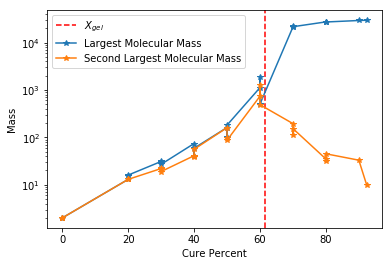

In [11]:
df_filtered = df[(df.bond==True)]
df_sorted = df_filtered.sort_values('cure_percent')
#df_sorted.plot(x='cure_percent',y='average_network')
#
#
#df_100 = df_filtered[df_filtered.stop_after_percent==100]
#df_100 = df_filtered[df_filtered.stop_after_percent==100]
df_100 = df_filtered[df_filtered.stop_after_percent>80]

print(df_100['curing_at_gel_point'][0])
#plt.plot(df_sorted['cure_percent'],
#             df_sorted['average_network'],
#             #df_sorted['network_size_std'],
#         marker='*',
#         label='Mean Molecular Mass')
#plt.plot(df_sorted['cure_percent'],
#             df_sorted['network_size_std'],
#         marker='*',
#         label='Molecular Mass Std')
plt.axvline(x=df_100['curing_at_gel_point'][0],
            color='r',
            linestyle='--',
           label='$X_{gel}$')
plt.plot(df_sorted['cure_percent'],
         df_sorted['largest_network'],
         marker='*',
         label='Largest Molecular Mass')
plt.plot(df_sorted['cure_percent'],
         df_sorted['second_largest_network'],
         marker='*',
         label='Second Largest Molecular Mass')
plt.yscale('log')
plt.xlabel('Cure Percent')
plt.ylabel('Mass')
plt.legend(fontsize=10)
#savefig(plt,
#       'gel_point_detection',
#       'gel_point_detection.pdf')
#df_sorted.plot(x='cure_percent',y='largest_network')

In [16]:
print(df_sorted['cure_percent'])

bb5828d680fadaf6f19b55f89c4a62b1     0.002500
37c543ffebeb70f1a63e2996bdc067b3     0.002500
eb5b2142784ad0becf27564deae596eb     0.002500
343c6735407b0628d2c89153f1fe5b71    20.000000
f0ade767045b4d76e3f8d7201f35c5d3    20.000000
2b9c483baab186d6c6d8f76accf21de9    20.000000
071482f95e4c1d546e7ed1dda9b1849f    30.000000
364d746ba29624d7c4675dba7925738f    30.000000
321462c5f20469c6336b545f9a069b97    30.000000
2bff4412159cb91f72300fa47899785f    40.000000
504483a0d4b999f53e690779537814cd    40.000000
067ecba12d0cafa8d1317d4a5339048a    40.002499
8c3710c4a91e29707751ad61dca4006d    50.000000
6530bdc87d0e5f2aca75cd4685154135    50.000000
d2644c7b9c244420fad6dbf1555a25da    50.000000
691ef18568be3e89f748a07dd49ac727    60.000000
0f6abaca05ca4b0001f9d9a80faf2559    60.000000
54de10dabe1b5ecab000917e4452ce9d    60.000000
97c0c857ef80db3b32e1521e29338bd8    70.000000
2767496fc4a5c711fa7eb91a95c58d3e    70.000000
342648e6091e3b6e02b76837e5e48049    70.000000
3eb523dcbac2528a7df7b51175aabeb5  